## Zadanie B

### Useful imports

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x, coeff):
    result = 0
    for a in coeff:
        result = result*x + a
    return result

In [3]:
def df(x, coeff):
    result = 0
    diff_coeff = [a * (len(coeff)-i-1) for i, a in enumerate(coeff[:-1])]
    for a in diff_coeff:
        result = result*x + a
    return result

In [4]:
def p(coeff):
    return lambda x: f(x, coeff)

In [5]:
def dp(coeff):
    return lambda x: df(x, coeff)

In [6]:
EPS = 1e-7
def newton(f, df, x, it=0, maxit=25):
    xi = x - f(x) / df(x)
    y = f(xi)
    if abs(y.real) < EPS and abs(y.imag) < EPS:
        return xi
    if it > maxit:
        return None
    return newton(f, df, xi, it + 1, maxit)

### Plotting

In [7]:
COLORS = ["blue", "orange", "red", "green", "purple", "yellow", "pink"]

In [8]:
def poly(coeff):
    return p(coeff), dp(coeff), np.roots(coeff)

In [9]:
def plot(f, df, roots, re=(-1, 1), im=(-1, 1), acc=1e3, maxit=25):
    px = np.arange(*re, (re[1] - re[0]) / acc)
    py = np.arange(*im, (im[1] - im[0]) / acc)

    results = {
        "x": [],
        "y": [],
        "color": []
    }

    for i, x in enumerate(px):
        for y in py:
            results["x"].append(x)
            results["y"].append(y)
            x0 = newton(f, df, complex(x, y), maxit=25)
            if x0 is None:
                results["color"].append("black")
            else:
                diff = roots - x0
                i = np.argmin(diff.real ** 2 + diff.imag ** 2)
                results["color"].append(COLORS[i])
    plt.scatter(results["x"], results["y"], c=results["color"], marker=",", lw=0, s=1)
    plt.show()

## Examples

In [10]:
ACC = 5e2

### $ f(x) = x^3 - 1 $

<IPython.core.display.Javascript object>


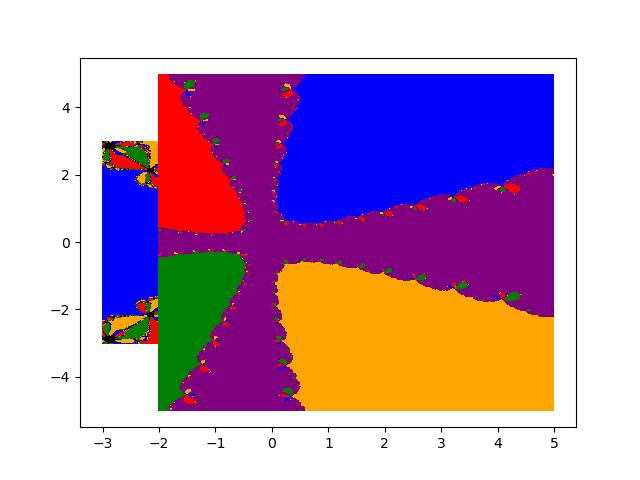

In [17]:
coeff =  [1, 0, 0, -1]
re, im = (-1, 1), (-1, 1)

plot(*poly(coeff), re=re, im=im, acc=ACC)

### $ f(x) = x^5 - 1 $

In [23]:
coeff = [1, 0, 0, 0, -1]
re, im = (-3, 3), (-3, 3)

plot(*poly(coeff), re=re, im=im, acc=ACC)

### $f(x) = 6x^5 + 5x^4 + 4x^3 + 5x^2 + 6x + 1$

In [24]:
coeff = [6,5,4,5,6,1]
re, im = (-2, 5), (-5, 5)

plot(*poly(coeff), re=re, im=im, acc=ACC)